# Statistics 2: Limit of Detection/Quantitation and Standard Deviation

Welcome back to Python! Last time we discussed mean, standard deviation, and calibration curves. Today, we are going to review calibration curves and move on to a method called standard addition. Standard addition is often used in atomic spectroscopy because it helps to correct for some issues with flame or plasma instability as well as matrix effects. Along the way, we will cover limits of detection.

First, we need to execute these imports to load the libraries we need, numpy and matplotlib. Remember to hit Ctrl + Enter or Shift + Enter to execute the block of code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
print("Libraries loaded; ready to begin!")

Libraries loaded; ready to begin!


## Calibration Curves, Limit of Detection, and Limit of Quantitation

Now, let's generate a calibration curve for some atomic absorbance data. The cal_x array will give the concentration of lead atoms in our standard in micromolar units. The cal_y will give the absorbance values for these standards on a flame atomic absorption instrument. To simulate a real measurement, we will add some noise to the calibration curve. 

Why should the calibration curve be linear? Beer's law. Absorbance = Slope * Concentration + Intercept. Ideally, the intercept should be 0 and the slope should be the molar absorptivity times the path length. But, noise can distort these. 

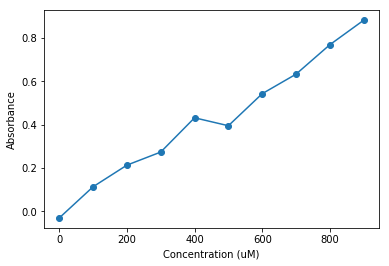

In [3]:
slope = 0.0009 # The slope of the calibration curve
cal_x = np.arange(0, 1000, 100) # Generates an array of values starting at 0 and proceeding to 1000 (exclusive) in steps of 100
cal_y = cal_x * slope # y = slope * x

sd_noise = 0.05 # Standard Deviation of the Noise
noise = np.random.normal(0, sd_noise, len(cal_x)) # Creates random noise with a standard deviation of sd_noise
cal_y = cal_y + noise # Adds in noise

#Plot the calibration curve
plt.plot(cal_x, cal_y, marker = "o")
plt.xlabel("Concentration (uM)")
plt.ylabel("Absorbance")
plt.show()

**Problem 1** 

a) Using what you learned from the last Python homework and the calibration curve below, solve for the concentration of lead given an absorbance value of 0.5. b) Solve for the concentration of lead given an absorbance value of 0.05. c) Plot these values on a plot of cal_x vs. cal_y as red dots.  

Hint, you will need to use a linear regression to get the slope and intercept. The command, np.polyfit(x,y, 1), should be useful. 

Hint, after you solve for the concentration value, plt.plot(solved_concentration, abs_value, marker="o", color="red") should help add a dot at the correct place to the plot for one point. Don't forget to add both. 

In [4]:
slope = 0.0009 # The slope of the calibration curve
cal_x = np.arange(0, 1000, 100) # Generates an array of values starting at 0 and proceeding to 1000 (exclusive) in steps of 100
cal_y = cal_x * slope # y = slope * x

sd_noise = 0.05 # Standard Deviation of the Noise
noise = np.random.normal(0, sd_noise, len(cal_x)) # Creates random noise with a standard deviation of 0.05
cal_y = cal_y + noise # Adds in noise

# Your Code Here



The "correct" value based on the calibration curve we defined above should be 0.5 / 0.0009 = 555.556 and 0.05 / 0.0009 = 55.5556 based on the slope we defined above. Are your values equal to that? Probably not. Why? There is noise in the calibration curve. There may also be noise in the measurement. 

Here, we defined the noise to have a standard deviation of 0.05, and the measurement for (a) has a value of 0.5. Thus, the noise is around 10% of the measurement, and we would expect our measurement to be only accurate within around 10%. For an absorbance of 0.05 from (b), the noise is 100% of the measurement. Clearly, we need to be careful when the noise reaches that level. 

**Limit of Detection**

The limit of detection (LoD) is defined as 3 times the standard deviation of the measurment. Because we know that the standard deviation of the noise is 0.05, this would give a limit of detection of 0.05 * 3 or an absorbance of 0.15. To calculate the limit of detection in units of concentration, we just need to subtract intercept and divide by the slope (0.15 - intercept)/slope. For an ideal sample, the intercept is 0 and the slope is 0.009. Thus, this should be 166 uM for this sample. 

Note: In practice, you need to use the standard deviation of replicate sample measurements, but using the standard deviation of the noise is good enough for our purposes. 

**Limit of Quantitation**

Quantitation requires a more robust signal than mere detection. The limit of quantitation (LoQ) is thus defined as 10 times the standard deviation of the measurement.

**Problem 2**

Calculate the a) limit of detection and b) the limit of quantitation for the noisy calibration curve from problem 1 in units of concentration. Use the fit slope and intercept values that you determined from the linear regression (the polyfit command). Print the value.

In [5]:
## Your Code Here



From these numbers, you can see that the smallest absorbance (0.05) is below the LoD and the LoQ. Even the higher absorbance (0.5) may be above the LoQ. Clearly, we need to improve our measurement. 

## Standard Addition

Standard addition is a brilliant method! The basic idea is to add the same amount of unknown sample to each calibration point. Let's walk through it with an example of a 555 uM sample. To do this, I've copied the code from above and made one important change of adding the unknown to each value. I've also set the noise to zero to help make things easier to see for now.

The sample absorbance is: 0.4995


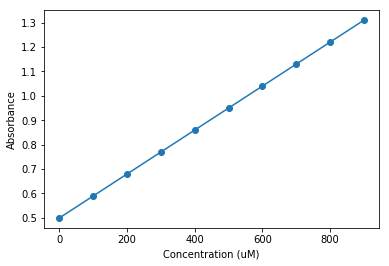

In [6]:
slope = 0.0009 
cal_x = np.arange(0, 1000, 100) 
cal_y = cal_x * slope 

sd_noise = 0.00 # Standard Deviation of the Noise is set to 0 for this example.
noise = np.random.normal(0, sd_noise, len(cal_x)) 
cal_y = cal_y + noise 


# STANDARD ADDITION

sample_conc = 555 # The concentration of the sample
sample_abs = sample_conc * slope # The absorbance due to the sample. From Beer's Law where slope is epsilon * b.
print("The sample absorbance is:", sample_abs)
exp_y = cal_y + sample_abs # Adding the sample absorbance to the calibration.


#Plot the calibration curve
plt.plot(cal_x, exp_y, marker = "o") # NOTE: Using exp_y rather than cal_y!!!
plt.xlabel("Concentration (uM)")
plt.ylabel("Absorbance")
plt.show()

Now, let's determine the slope and intercept of this new standard addition curve, cal_x vs. exp_y. 

In [7]:
fit = np.polyfit(cal_x, exp_y, 1)
fit_intercept = fit[1]
fit_slope = fit[0]

print("Slope:", fit_slope)
print("Y-Intercept:", fit_intercept)


Slope: 0.0009
Y-Intercept: 0.4995


The slope should be similar to before (around 0.0009), but the intercept should be much larger (around 0.5 rather than 0). Keep in mind that this is the y-intercept. This is the sample absorbance. Even with no added internal standard, the sample with have an absorbance of 0.5.

**Problem 3**

Now, calculate the x-intercept from the fit above and print the value. Hint, the x-intercept is where y=0. 

In [8]:
# Your Code Here


Does this look familiar? It should be the concentration of our sample, 555 uM but negative. Why is this?

**The absolute value of the x-intercept in a standard addition curve is the sample concentration.** The basic idea is that if you added 555 uM lead to the sample, you would get an absorbance of 0.5. Similarly, if you took away 555 uM lead from the sample, you would decrease the absorbance by 0.5. The x-intercept is where the absorbance is 0, so it tells you how much concentration you would have to remove from the sample to take away all of the absorbance. In this case, you would need to remove 555 uM lead to get an absorbance of 0.

In summary, by adding known quantities of analyte to a sample with an unknown concentration of analyte, you can calculate how much unknown was present. 

**Why is standard addition useful?**  Why not just generate a normal calibration curve? Standard addition helps correct for matrix/background interference. 

Let's examine these by working through a problem.

**Problem 4**

Imagine something in the sample interferes with the lead in the sample, causing only 80% of the signal it should have. This will cause a slope of 0.8 times the correct slope. In the case of a standard calibration curve, the measured value would be 20% lower than it should be because the "matrix effects" were dampening the absorbance in the sample but not in the calibration solution. 

Working from the staring point provided below, calculate the concentration of sample from the standard addition curve. Print the concentration.

In [9]:
slope = 0.0009 * 0.8 # NOTE: THE SLOPE HER IS 80% OF WHAT IT SHOULD BE
cal_x = np.arange(0, 1000, 100)
cal_y = cal_x * slope

sd_noise = 0.00 # The noise is still 0
noise = np.random.normal(0, sd_noise, len(cal_x)) 
cal_y = cal_y + noise


# STANDARD ADDITION

sample_conc = 555 
sample_abs = sample_conc * slope # NOTE: THE DECREASED SLOPE IS INCLUDED HERE AS WELL
print("The sample absorbance is:", sample_abs)
exp_y = cal_y + sample_abs # Adding the sample absorbance to the calibration.


# Your Code Here


The sample absorbance is: 0.3996


As you should see from Problem 4, the answer is the same even though the response 80% of what it should be.

One challenge with standard addition is that it relies on having a very good fit because you are extrapolating the line to the x-intercept. Due to the noise, standard addition will perform worse than the calibration curve. 

Below, I've repeated the calculations from Problem 1 and Problem 4 for three different sets of random noise at the same level. The calibration curve is more accurate.

In [9]:
measurements_calibration_curve = [545.487441858, 539.665134183, 571.062201681]
mean_cc = np.mean(measurements_calibration_curve)
std_cc = np.std(measurements_calibration_curve)


measurements_standard_addition = [555.003890577, 519.424714077, 631.838480039]
mean_sa = np.mean(measurements_standard_addition)
std_sa = np.std(measurements_standard_addition)

print("Calibration Curve Mean:", mean_cc, "+/-", std_cc)
print("Standard Addition Mean:", mean_sa, "+/-", std_sa)

Calibration Curve Mean: 552.071592574 +/- 13.6371366094
Standard Addition Mean: 568.755694898 +/- 46.9116032981


**Problem 5**

To wrap everything up, I have generated the same standard addition curve from above but added in noise. I have also plotted the theoretical standard addition curve from the theoretical slope and intercept (make sure these make sense to you). I plotted the theoretical curve in green.

Your task is to a) generate the experimental fit from the experimental slope and intercept and plot it from the x-intercept through the end of the standard addition curve. Add this to the plot below in red. It should look similar but not identical (due to noise) to the green plot. Also, b) print the concentration of lead that you determined from the experimental fit. 

Note: You should see that the green and red lines match closely over the calibration region but diverge as they move towards the x-intercept, which is the main source of error.

Note: Make sure you understand what each of the dashed black lines on the plot means. 

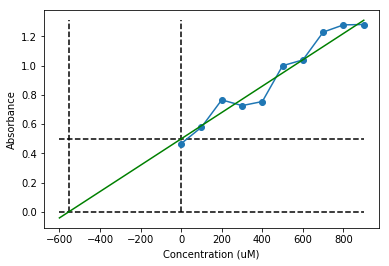

In [11]:
slope = 0.0009
cal_x = np.arange(0, 1000, 100)
cal_y = cal_x * slope

sd_noise = 0.05
noise = np.random.normal(0, sd_noise, len(cal_x)) 
cal_y = cal_y + noise

# STANDARD ADDITION

sample_conc = 555 
sample_abs = sample_conc * slope
exp_y = cal_y + sample_abs

# The Theoretical Fit

the_x = np.arange(-600,1000,100)
the_y = the_x * slope + sample_abs


# Your Code Here




# The Plots
plt.plot(cal_x, exp_y, marker="o")
plt.hlines(0, np.amin(the_x), np.max(the_x), color="k", linestyle = "--") # Adds a black dashed line at the x-intercept
plt.vlines(-sample_conc, 0, np.amax(the_y), color="k", linestyle = "--") # Adds a vertical line at the x-intercept
plt.hlines(sample_abs, np.amin(the_x), np.max(the_x), color="k", linestyle = "--") # Adds a line at the y-intercept
plt.vlines(0, 0, np.amax(the_y), color="k", linestyle = "--") # Adds a vertical line at the y-intercept
plt.plot(the_x, the_y, color="green")

# Your Code Here to add a red line that looks like the green one but based on experimental values.



plt.xlabel("Concentration (uM)")
plt.ylabel("Absorbance")
plt.show()


When you are done, print this to PDF and upload it to D2L in the assignment folder. The homework is due 10/10 and will be graded both on completion (1 pt) and accuracy (1 pt). Stop by during office hours or work together if you need help. 

In [11]:
print("Python is awesome!")

Python is awesome!
